<font size=6><b>Titanic
    

<img src="./logo.png">

* ref :  https://www.kaggle.com/competitions/titanic/data
* Data Desc.
<pre>
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

# Data Load
* head()
* info() .. shape

In [2]:
train = pd.read_csv("./train.csv")
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.shape

(891, 12)

In [5]:
train.columns = train.columns.str.lower()
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [6]:
train.head(1)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


# 결측 확인

In [7]:
train.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [8]:
train.isna().sum() [   train.isna().sum()>0   ]

age         177
cabin       687
embarked      2
dtype: int64

* 출력결과 다음과 같이 출력
<pre>
col    cnt     nan_cnt     nan_rate
age    891     177         23%

In [9]:
col       = train.columns   
cnt       = train.notna().sum()   
nan_cnt   = train.isna().sum()       
nan_rate  = round(  (nan_cnt / train.shape[0]) * 100,  2 )
unique_cnt = train.nunique()

dic   = {"cnt":cnt, "nan_cnt":nan_cnt, "nan_rate":nan_rate, "unique_cnt":unique_cnt}
nandf = pd.DataFrame(dic)
nandf.sort_values(by="nan_cnt", ascending=False).T

,cabin,age,embarked,passengerid,survived,pclass,name,sex,sibsp,parch,ticket,fare
cnt,204.0,714.00,889.00,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0,891.0
nan_cnt,687.0,177.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nan_rate,77.1,19.87,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique_cnt,147.0,88.00,3.00,891.0,2.0,3.0,891.0,2.0,7.0,7.0,681.0,248.0


# 중복값 확인
* df[컬럼].unique()
* df[컬럼].nunique()

In [10]:
# select distinct job from emp;
train['sex'].unique()

array(['male', 'female'], dtype=object)

In [11]:
train['sex'].nunique()

2

In [12]:
train['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [13]:
# train.nunique() --- 정상
# train.unique()  --- 에러

for col in train.columns:
    if train[col].nunique() < 100:
        print( col, train[col].nunique(),  train[col].unique() )

survived 2 [0 1]
pclass 3 [3 1 2]
sex 2 ['male' 'female']
age 88 [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
sibsp 7 [1 0 3 4 2 5 8]
parch 7 [0 1 2 5 3 4 6]
embarked 3 ['S' 'C' 'Q' nan]


# EDA 
* EDA (Exploratory Data Analysis, 탐색적 데이터 분석)
* 통계적 분석 & 차트(시각화)

In [14]:
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [15]:
### # ! pip install matplotlib

<pre>
Collecting matplotlib
  Downloading matplotlib-3.6.3-cp38-cp38-win_amd64.whl (7.2 MB)
     ---------------------------------------- 7.2/7.2 MB 7.8 MB/s eta 0:00:00
Collecting kiwisolver>=1.0.1
  Downloading kiwisolver-1.4.4-cp38-cp38-win_amd64.whl (55 kB)
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
Collecting fonttools>=4.22.0
  Downloading fonttools-4.38.0-py3-none-any.whl (965 kB)
     -------------------------------------- 965.4/965.4 kB 2.3 MB/s eta 0:00:00
Collecting cycler>=0.10
  Downloading cycler-0.11.0-py3-none-any.whl (6.4 kB)
Collecting pillow>=6.2.0
  Downloading Pillow-9.4.0-cp38-cp38-win_amd64.whl (2.5 MB)
     ---------------------------------------- 2.5/2.5 MB 1.9 MB/s eta 0:00:00
Collecting pyparsing>=2.2.1
  Downloading pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ---------------------------------------- 98.3/98.3 kB 1.9 MB/s eta 0:00:00
Collecting contourpy>=1.0.1
  Downloading contourpy-1.0.7-cp38-cp38-win_amd64.whl (162 kB)
     -------------------------------------- 163.0/163.0 kB 2.0 MB/s eta 0:00:00
Requirement already satisfied: packaging>=20.0 in c:\ai\pythonproject\venv\lib\site-packages (from matplotlib) (23.0)
Requirement already satisfied: python-dateutil>=2.7 in c:\ai\pythonproject\venv\lib\site-packages (from matplotlib) (2.8.2)
Requirement already satisfied: numpy>=1.19 in c:\ai\pythonproject\venv\lib\site-packages (from matplotlib) (1.24.2)
Requirement already satisfied: six>=1.5 in c:\ai\pythonproject\venv\lib\site-packages (from python-dateutil>=2.7->matplotlib) (1.16.0)
Installing collected packages: pyparsing, pillow, kiwisolver, fonttools, cycler, contourpy, matplotlib
Successfully installed contourpy-1.0.7 cycler-0.11.0 fonttools-4.38.0 kiwisolver-1.4.4 matplotlib-3.6.3 pillow-9.4.0 pyparsing-3.0.9

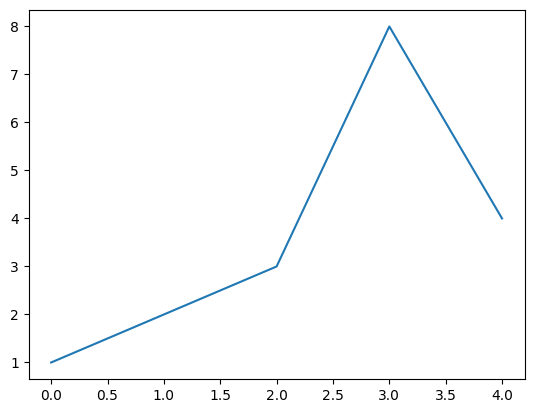

In [16]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,8,4])
plt.show()

## passengerid : all unique drop()
* unique해서 패턴을 보이지 않음 -- 분석대상에서 제외(삭제)

In [17]:
traincp = train.copy()
traincp.head(2)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [18]:
traincp = traincp.drop(0, axis=0)  #--- drop(row인덱스값, 줄단위로지우기)
# traincp.drop(0, axis=0, inplace=True)

In [19]:
traincp.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [20]:
traincp = traincp.drop('passengerid', axis=1) # drop(컬럼이름, axis=1)  컬럼 단위로 지우기
traincp.head(1)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [21]:
del traincp  # 연습끝 메모리 해제

In [22]:
train = train.drop('passengerid', axis=1)

In [23]:
train.head(1)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


## survived : target

0    549
1    342
Name: survived, dtype: int64


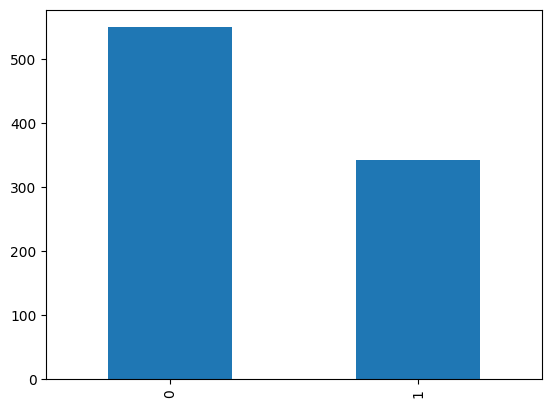

In [24]:
print(train['survived'].value_counts())

train['survived'].value_counts().plot(kind='bar')
plt.show()

In [25]:
train.groupby('survived')['survived'].count()

survived
0    549
1    342
Name: survived, dtype: int64

## pclass : 주요 feature

3    491
1    216
2    184
Name: pclass, dtype: int64


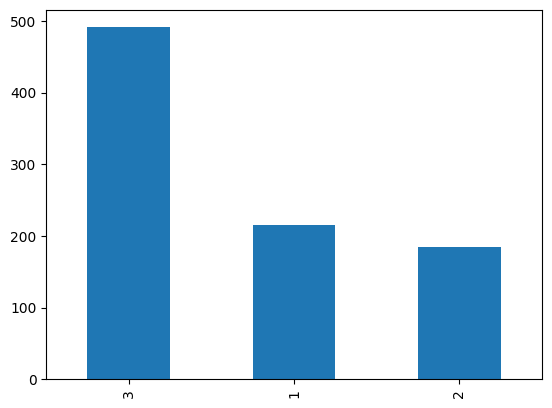

In [26]:
print(  train['pclass'].value_counts()  )
train['pclass'].value_counts().plot(kind='bar')
plt.show()

In [27]:
train[['pclass','survived']].value_counts().sort_index() 

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

<AxesSubplot: xlabel='pclass,survived'>

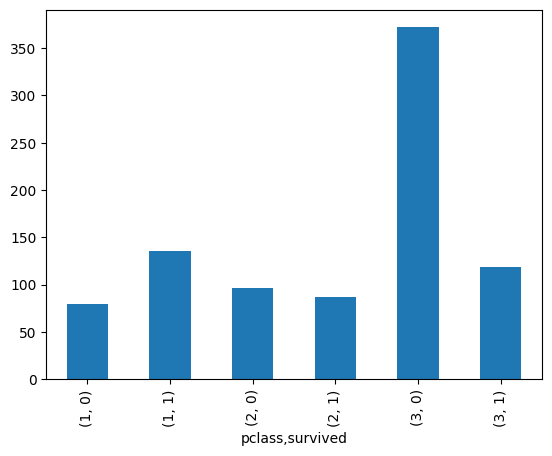

In [28]:
train[['pclass','survived']].value_counts().sort_index().plot(kind='bar')

## cabin : drop()예정

In [29]:
train[ train['cabin'].notna() ] ['cabin']

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: cabin, Length: 204, dtype: object

In [30]:
train['cabin2'] = train['cabin'].str[0:1]
train[['cabin','cabin2']].head(3)

,cabin,cabin2
0,NaN,NaN
1,C85,C
2,NaN,NaN


In [31]:
train[['cabin2','survived']].value_counts().sort_index()

cabin2  survived
A       0            8
        1            7
B       0           12
        1           35
C       0           24
        1           35
D       0            8
        1           25
E       0            8
        1           24
F       0            5
        1            8
G       0            2
        1            2
T       0            1
dtype: int64

In [32]:
train[['cabin2','pclass']].value_counts().sort_index()

cabin2  pclass
A       1         15
B       1         47
C       1         59
D       1         29
        2          4
E       1         25
        2          4
        3          3
F       2          8
        3          5
G       3          4
T       1          1
dtype: int64

## embarked : 최빈도 mode()

In [33]:
train[['embarked','survived']].value_counts().sort_index()

embarked  survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

* 결측채우기

In [34]:
train['embarked'].isna().sum()

2

In [35]:
train[['age','fare']].describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [36]:
train[['embarked','sex']].describe()

,embarked,sex
count,889,891
unique,3,2
top,S,male
freq,644,577


In [37]:
print( train['embarked'].mode().values[0] )

S


In [38]:
mode_val = train['embarked'].mode().values[0]
print(mode_val)
train['embarked'] =  train['embarked'].fillna(mode_val)

S


In [39]:
# 확인용
train['embarked'].isna().sum()

0

## sex : 주요 feature

In [40]:
train['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [41]:
train[['sex','survived']].value_counts().sort_index()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

## name : 호칭분리

* <b>정규표현식</b>
* match() search() findall()
    * re.search(패턴, 타겟문장)
    * p = re.compile(패턴) <b>p.search(타겟문장)  </b>

In [42]:
train['name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: name, dtype: object

### 정규표현식
* df['컬럼'].str.extract(정규표현식)

In [43]:
import re

#### by 예림

In [44]:
p=re.compile('\s*\w+\s*')
p.findall("Futrelle, Mrs. Jacques Heath (Lily May Peel)")[1].strip()

'Mrs'

#### by 영기

In [45]:
A = re.search('[A-Za-z]*[.]','helradad, Miss. adaf')
print ( A)
print( "search()한 결과를 string으로 받기 : " , A.group() )

<re.Match object; span=(10, 15), match='Miss.'>
search()한 결과를 string으로 받기 :  Miss.


#### by 형진

In [46]:
p = re.compile('\s[A-Za-z]+[.]\s')
p.findall("Futrelle, Mrs. Jacques Heath (Lily May Peel)")[0].strip()

'Mrs.'

In [47]:
p = re.compile('\s[\w]+[.]\s')
p.findall("Futrelle, Mrs. Jacques Heath (Lily May Peel)")[0].strip()

'Mrs.'

In [48]:
# train['name'].str.extract('정규표현식패턴')

train['name_title'] = train['name'].str.extract('(\s[\w]+[.]\s)')
train['name_title'] = train['name_title'].str.strip()
train[['name','name_title']].tail()

,name,name_title
886,"Montvila, Rev. Juozas",Rev.
887,"Graham, Miss. Margaret Edith",Miss.
888,"Johnston, Miss. Catherine Helen ""Carrie""",Miss.
889,"Behr, Mr. Karl Howell",Mr.
890,"Dooley, Mr. Patrick",Mr.


In [49]:
"-"+train['name_title']+"-"

0        -Mr.-
1       -Mrs.-
2      -Miss.-
3       -Mrs.-
4        -Mr.-
        ...   
886     -Rev.-
887    -Miss.-
888    -Miss.-
889      -Mr.-
890      -Mr.-
Name: name_title, Length: 891, dtype: object

* name_title의 평균 나이

In [50]:
# train.groupby('name_title')['name_title'].count().sort_values(ascending=False)
train['name_title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: name_title, dtype: int64

<pre>
Rev.   목사 --> Mr.
Don. 상대 남성의 존칭 --> Mr.
Jonkheer.  無작위귀족(Jonkheer)  --> Mr.
Major. 미군계급  --> Mr.
Col.   미군장교  --> Mr.
Capt.  선생님,공군 --> Mr.
Sir.      귀족남석 --> Mr.

Countess. 백작부인  --> Mrs.
Mme.  Madame  --> Mrs.

Mlle.  나이어린여아  --> Miss.
Ms.   결혼여부     --> Miss.
Lady. 나이어린여성 --> Miss.

### 피쳐 값 변경
1) df.replace('A','B', inplace=True)  
2) df.map({'A':'B'})
3) df.apply(lambda
4) df.loc(줄,칸) = 변경값

#### replace()

In [51]:
traincp = train.copy()
traincp['pclass'] = traincp['pclass'].replace(3, 33)
# traincp['pclass'].replace(3, 33, inplace=True)

traincp['pclass'] = traincp['pclass'].replace([1,2,3], [11,22,33])
traincp.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title
0,0,33,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr.
1,1,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.
2,1,33,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss.


#### map()

In [52]:
dic = {"male":1, "female":0}
traincp['sex2'] = traincp['sex'].map(dic)
traincp[['sex','sex2']].tail(100)

,sex,sex2
791,male,1
792,female,0
793,male,1
794,male,1
795,male,1
...,...,...
886,male,1
887,female,0
888,female,0
889,male,1


#### apply(lambda)

In [53]:
traincp['sex'] = traincp['sex'].apply(lambda x : 'male' if x == 1 else 'female')
traincp.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,sex2
0,0,33,"Braund, Mr. Owen Harris",female,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr.,1
1,1,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.,0
2,1,33,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss.,0


#### 연습용

In [54]:
dic = {  'Mr.':'Mr.',
         'Rev.':'Mr.',
         'Don.':'Mr.',
         'Jonkheer.':'Mr.',
         'Major.':'Mr.',
         'Col.':'Mr.',
         'Capt.':'Mr.',
         'Sir.':'Mr.'
        }
traincp['name_title2'] = traincp['name_title'].map(dic)
traincp[['name_title','name_title2']][ traincp['name_title']=='Major.'].head()

,name_title,name_title2
449,Major.,Mr.
536,Major.,Mr.


In [55]:
traincp['name_title2']  = traincp['name_title'].replace(['Countess.','Mme.'],['Mrs.', 'Mrs.'])
traincp[['name_title','name_title2']][ traincp['name_title']=='Mme.'].head()

,name_title,name_title2
369,Mme.,Mrs.


In [56]:
traincp['name_title2']  = traincp['name_title'].apply(lambda x : 'Miss.' if x in ('Mlle.', 'Ms.', 'Lady.') else x )
traincp[['name_title','name_title2']][ traincp['name_title']=='Ms.'].head()

,name_title,name_title2
443,Ms.,Miss.


In [57]:
del traincp

#### 원본에 적용
*<font size=4 color=red><b> train.groupby("name_title2")['age'].transform("mean")

In [58]:
dic = {  'Mr.':'Mr.',
         'Rev.':'Mr.',
         'Don.':'Mr.',
         'Jonkheer.':'Mr.',
         'Major.':'Mr.',
         'Col.':'Mr.',
         'Capt.':'Mr.',
         'Sir.':'Mr.',  #------------------------
        'Mrs.':'Mrs.',
        'Countess.':'Mrs.',
        'Mme.':'Mrs.', #------------------------
        'Miss.':'Miss.',
        'Mlle.':'Miss.',
        'Ms.':'Miss.',
        'Lady.':'Miss.',
        'Master.':'Master.',  #------------------------
        'Dr.':'Dr.'
        }
train['name_title2'] = train['name_title'].map(dic)
# train[['name_title','name_title2']][ train['name_title']=='Major.'].head()
train[['name_title','name_title2']].head()

,name_title,name_title2
0,Mr.,Mr.
1,Mrs.,Mrs.
2,Miss.,Miss.
3,Mrs.,Mrs.
4,Mr.,Mr.


In [59]:
train['name_title2'].isna().sum()

0

In [60]:
train['name_title2'].value_counts()

Mr.        531
Miss.      186
Mrs.       127
Master.     40
Dr.          7
Name: name_title2, dtype: int64

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   name         891 non-null    object 
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   ticket       891 non-null    object 
 8   fare         891 non-null    float64
 9   cabin        204 non-null    object 
 10  embarked     891 non-null    object 
 11  cabin2       204 non-null    object 
 12  name_title   891 non-null    object 
 13  name_title2  891 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 97.6+ KB


### 호칭별 평균 나이

In [62]:
train.groupby('name_title2').first()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title
name_title2,,,,,,,,,,,,,
Dr.,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,C,Dr.
Master.,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,F4,S,F,Master.
Miss.,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,G,Miss.
Mr.,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,E46,S,E,Mr.
Mrs.,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.


#### apply() vs transform()
* ref : https://steadiness-193.tistory.com/42
* <font color=red size=4><b> emp.groupby("deptno")['sal'].transform(np.mean)

<table style="border-collapse: collapse; width: 100%;" border="1">
<tbody>
<tr>
<td style="width: 33.3333%;">&nbsp;</td>
<td style="width: 33.3333%; text-align: center;"><b>apply</b></td>
<td style="width: 33.3333%; text-align: center;"><b>transform</b></td>
</tr>
<tr>
<td style="width: 33.3333%; text-align: center;"><br><b>[공통]</b><br><br></td>
<td style="width: 66.6666%; text-align: center;" colspan="2">컬럼명을 메서드 밖에서 명시하면 결과는 같게 나온다.</td>
</tr>
<tr>
<td style="width: 33.3333%; text-align: center;"><b>[차이1]</b><br><br><b>컬럼명을 메서드 안에서 명시하면</b></td>
<td style="width: 33.3333%; text-align: center;">그룹별 시리즈 리턴</td>
<td style="width: 33.3333%; text-align: center;">에러</td>
</tr>
<tr>
<td style="width: 33.3333%; text-align: center;"><b><span style="color: #333333;">[차이2]<br></span></b><br><b><span style="color: #333333;">컬럼명을 메서드 안과 밖에 <br>모두 명시하지 않는다면</span></b></td>
<td style="width: 33.3333%; text-align: center;">기존 데이터의 자료형과 함수가<br><br><u>연산 가능해야만 실행</u>된다.</td>
<td style="width: 33.3333%; text-align: center;"><u>연산 가능한 컬럼만 알아서</u><br><br><u>필터링</u>되어 결과가 나온다.</td>
</tr>
<tr>
<td style="width: 33.3333%; text-align: center;"><b><span style="color: #333333;"><span style="color: #333333;">[차이3]<br></span><br><span style="color: #333333;">연산 가능한 컬럼만 함수 적용한다면</span></span></b></td>
<td style="width: 33.3333%; text-align: center;"><u>
    <font color=red><b>그룹별 데이터프레임</u> 출력<br><br> <font color=red><b>(멀티인덱스)</td>
<td style="width: 33.3333%; text-align: center;"><u><font color=red><b>기존 인덱스</u> 유지</td>
</tr>
</tbody>
</table>

In [63]:
emp = pd.read_csv("../lec08_emp.csv")
emp.columns = emp.columns.str.lower()
emp.head(2)

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,SMITH,CLERK,7902.0,1980-12-17 00:00:00,800,NaN,20
1,7499,ALLEN,SALESMAN,7698.0,1981-02-20 00:00:00,1600,300.0,30


In [64]:
emp.groupby("deptno")["sal"].mean()

deptno
10    2916.666667
20    2175.000000
30    1566.666667
Name: sal, dtype: float64

In [65]:
emp['sal'][emp['deptno']==10]

6     2450
8     5000
13    1300
Name: sal, dtype: int64

In [66]:
emp['sal']

0      800
1     1600
2     1250
3     2975
4     1250
5     2850
6     2450
7     3000
8     5000
9     1500
10    1100
11     950
12    3000
13    1300
Name: sal, dtype: int64

In [67]:
# emp.groupby("deptno").apply(np.mean)
emp.groupby("deptno")['sal'].apply(np.mean)

deptno
10    2916.666667
20    2175.000000
30    1566.666667
Name: sal, dtype: float64

In [68]:
emp.groupby("deptno").transform("mean")
# emp.groupby("deptno")['sal'].transform(np.mean)

,empno,mgr,sal,comm
0,7700.200000,7732.2,2175.000000,NaN
1,7686.000000,7721.5,1566.666667,550.0
2,7686.000000,7721.5,1566.666667,550.0
3,7700.200000,7732.2,2175.000000,NaN
4,7686.000000,7721.5,1566.666667,550.0
5,7686.000000,7721.5,1566.666667,550.0
6,7851.666667,7810.5,2916.666667,NaN
7,7700.200000,7732.2,2175.000000,NaN
8,7851.666667,7810.5,2916.666667,NaN
9,7686.000000,7721.5,1566.666667,550.0


#### pivot_table()
<pre>def pivot_table(
        <b>
        values=None,
        index=None,
        columns=None,
        aggfunc="mean",
        </b>
        fill_value=None,
        margins=False,
        dropna=True,
        margins_name="All",
        observed=False,
        sort=True,
    )

In [69]:
emp.pivot_table(index="deptno", values="sal", aggfunc="mean")

,sal
deptno,
10,2916.666667
20,2175.000000
30,1566.666667


In [70]:
emp.groupby("deptno")["sal"].mean()

deptno
10    2916.666667
20    2175.000000
30    1566.666667
Name: sal, dtype: float64

#### 컬럼명을 메서드 밖에서 명시

In [71]:
traincp =  train.copy()

In [72]:
traincp.loc[0, 'age']

22.0

In [73]:
def age_minus(x):
    return x - 1
traincp.groupby('name_title2', group_keys=True)['age'].apply( age_minus).head()

name_title2     
Dr.          245    43.0
             317    53.0
             398    22.0
             632    31.0
             660    49.0
Name: age, dtype: float64

* 결과 이상하다.. apply()와 동일한 결과가 나와야 하는데...

In [74]:
def age_minus(x):
    return x - 1
traincp.groupby('name_title2', group_keys=True)['age'].transform( age_minus).head()

0    21.0
1    37.0
2    25.0
3    34.0
4    34.0
Name: age, dtype: float64

#### 컬럼명을 메서드 안에서 명시

In [75]:
traincp.groupby('name_title2').first()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title
name_title2,,,,,,,,,,,,,
Dr.,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,C,Dr.
Master.,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,F4,S,F,Master.
Miss.,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,G,Miss.
Mr.,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,E46,S,E,Mr.
Mrs.,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.


In [76]:
def age_minus(x):
    return x - 1

# 그룹화 시킨 후 그룹된 나이만 함수에 적용
traincp.groupby('name_title2', group_keys=True).apply(lambda gdf : age_minus(gdf['age'])  ).head()

name_title2     
Dr.          245    43.0
             317    53.0
             398    22.0
             632    31.0
             660    49.0
Name: age, dtype: float64

In [77]:
# ---------------------------------------------------
# transform은 에러 난다 
# ---------------------------------------------------
# def age_minus(x):
#     return x - 1
# traincp.groupby('name_title2', group_keys=True).transform(lambda gdf : age_minus(gdf['age'])  ).head()

#### 컬럼명을 사용하지 않는 경우 
* 컬럼명을 메서드 안과 밖에 모두 명시하지 않는다

In [78]:
# ---------------------------------------------------
# apply는 에러 난다  : -1연산이 안되는 글자 컬럼들이 있기 때문에
# ---------------------------------------------------
# def age_minus(x):
#     return x - 1
# traincp.groupby('name_title2', group_keys=True).apply(age_minus).head()

In [79]:
# 데이터프레임 전체를 대상으로 함수를 적용하면 : 연산이 되는 컬럼만 골라서 연산한다.
# (== 자동 필러링한다)
def age_minus(x):
    return x - 1
traincp.groupby('name_title2', group_keys=True).transform(age_minus).head()

,survived,pclass,age,sibsp,parch,fare
0,-1,2,21.0,0,-1,6.2500
1,0,0,37.0,0,-1,70.2833
2,0,2,25.0,-1,-1,6.9250
3,0,0,34.0,0,-1,52.1000
4,-1,2,34.0,-1,-1,7.0500


#### 연산 가능한 컬럼만 함수 적용

In [80]:
traincp2 = traincp.groupby('name_title2', as_index=False)[['age','fare']]
traincp2 = traincp2.count()  # g.count() :  group화된 프레임 ---> 일반 데이터프레임으로 변경
print(type(traincp2))
traincp2

<class 'pandas.core.frame.DataFrame'>


,name_title2,age,fare
0,Dr.,6,7
1,Master.,36,40
2,Miss.,150,186
3,Mr.,412,531
4,Mrs.,110,127


In [81]:
traincp2.groupby('name_title2', group_keys=True).apply(lambda gdf : gdf.fillna(gdf.mean()) )

,,name_title2,age,fare
name_title2,,,,
Dr.,0,Dr.,6,7
Master.,1,Master.,36,40
Miss.,2,Miss.,150,186
Mr.,3,Mr.,412,531
Mrs.,4,Mrs.,110,127


In [82]:
traincp2.groupby('name_title2', group_keys=True).transform(lambda gdf : gdf.fillna(gdf.mean()) )

,age,fare
0,6,7
1,36,40
2,150,186
3,412,531
4,110,127


In [83]:
del traincp
del traincp2

#### 원본에 적용

<font size=3><b>이름의 호칭을 이용해 평균 나이로 결측 채우기 시도

In [84]:
train.groupby('name_title2', group_keys=True)['age'].mean()

name_title2
Dr.        42.000000
Master.     4.574167
Miss.      22.020000
Mr.        32.891990
Mrs.       35.763636
Name: age, dtype: float64

<font color=red size=4> train.groupby("name_title2")<b>['age'].mean()</b><br>
<font color=red size=4> train.groupby("name_title2")<b>['age'].transform("mean")</b><br>
<font color=red size=4><b> train.groupby("name_title2")['age'].transform(np.mean)<br>

In [85]:
# train.groupby('name_title2', group_keys=True)['age'].transform(lambda gdf : gdf.fillna(gdf.mean()) )

train['age2'] = train['age'].fillna( train.groupby('name_title2')['age'].transform("mean") )     
train[['name_title2','age','age2']] [train['age'].isna()]

,name_title2,age,age2
5,Mr.,NaN,32.891990
17,Mr.,NaN,32.891990
19,Mrs.,NaN,35.763636
26,Mr.,NaN,32.891990
28,Miss.,NaN,22.020000
...,...,...,...
859,Mr.,NaN,32.891990
863,Miss.,NaN,22.020000
868,Mr.,NaN,32.891990
878,Mr.,NaN,32.891990


In [86]:
train[['name_title2', "survived"]].value_counts().sort_index()

name_title2  survived
Dr.          0             4
             1             3
Master.      0            17
             1            23
Miss.        0            55
             1           131
Mr.          0           447
             1            84
Mrs.         0            26
             1           101
dtype: int64

## age
* age2 : name_title2 를 이용해서 호칭별 평균나이로 결측 채우기

* 나이 통계치

In [87]:
train[['age2']].describe()

,age2
count,891.000000
mean,29.832004
std,13.285056
min,0.420000
25%,22.000000
50%,30.000000
75%,35.763636
max,80.000000


* 나이 구간화

In [88]:
#나누기   몫   나머지
89/10,  89//10 , 89%10

(8.9, 8, 9)

In [89]:
train[['age2','survived']].value_counts().sort_index()

age2   survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Length: 150, dtype: int64

In [90]:
train['age_gugan'] = train['age2']//10
train['age_gugan'] = train['age_gugan'].astype("int")
train[['age2','age_gugan']]
# int(str(80)[0:1])

,age2,age_gugan
0,22.00,2
1,38.00,3
2,26.00,2
3,35.00,3
4,35.00,3
...,...,...
886,27.00,2
887,19.00,1
888,22.02,2
889,26.00,2


In [91]:
train[['age_gugan','survived']].value_counts().sort_index()

age_gugan  survived
0          0            26
           1            40
1          0            61
           1            41
2          0           157
           1            99
3          0           202
           1           101
4          0            56
           1            34
5          0            28
           1            20
6          0            13
           1             6
7          0             6
8          1             1
dtype: int64

## crosstab()
<pre>
def crosstab(
    <b>
    index,     -- y축
    columns,   -- x축
    values=None,
    </b>
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins: bool = False,
    margins_name: str = "All",
    dropna: bool = True,
    normalize=False,
) -> DataFrame:

In [92]:
pd.crosstab(index  =[  train["pclass"]   , train['sex']       ],  
            columns=[  train["age_gugan"], train["survived"]  ]  
            # , values=train["survived"]    
            # , aggfunc="sum"
           )


age_gugan       0       1       2        3       4       5      6     7  8
survived        0   1   0   1   0   1    0   1   0   1   0   1  0  1  0  1
pclass sex                                                                
1      female   1   0   0  13   1  16    0  35   0  13   1  11  0  3  0  0
       male     0   2   3   2   9   9   26  17  16   9  11   4  9  1  3  1
2      female   0   8   0   8   3  24    1  16   1   9   1   5  0  0  0  0
       male     0   9   9   1  28   0   35   5   7   1   9   0  2  1  1  0
3      female  10  11  11  13  30  34   12  13   9   0   0   0  0  1  0  0
       male    15  10  38   4  86  16  128  15  23   2   6   0  2  0  2  0

## sibsp, parch

In [93]:
train['family'] = train['sibsp'] + train['parch'] + 1 #(+1은 본인)
train.sort_values("family", ascending=False).head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,name_title2,age2,age_gugan,family
180,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Miss.,Miss.,22.02000,2,11
846,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Mr.,Mr.,32.89199,3,11
792,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Miss.,Miss.,22.02000,2,11


In [94]:
train[train['ticket'] == "A/5 21171"]
train[train['ticket'] == "PC 17599"]
train[train['ticket'] == "CA. 2343"]
train[train['ticket'] == "2661"]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,name_title2,age2,age_gugan,family
65,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,NaN,Master.,Master.,4.574167,0,3
709,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,NaN,Master.,Master.,4.574167,0,3


In [95]:
train[['family','survived']].value_counts().sort_index()

family  survived
1       0           374
        1           163
2       0            72
        1            89
3       0            43
        1            59
4       0             8
        1            21
5       0            12
        1             3
6       0            19
        1             3
7       0             8
        1             4
8       0             6
11      0             7
dtype: int64

In [96]:
pd.crosstab( index=[  train['pclass'], train['survived']  ] , 
             columns = train['family']
           )

family            1   2   3   4   5   6   7   8   11
pclass survived                                     
1      0          51  19   6   2   0   2   0   0   0
       1          58  51  18   5   2   2   0   0   0
2      0          68  16  10   3   0   0   0   0   0
       1          36  18  21  10   1   1   0   0   0
3      0         255  37  27   3  12  17   8   6   7
       1          69  20  20   6   0   0   4   0   0

In [97]:
train[train['family']==3]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,name_title2,age2,age_gugan,family
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,Mrs.,Mrs.,27.000000,2,3
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,G,Miss.,Miss.,4.000000,0,3
38,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S,NaN,Miss.,Miss.,18.000000,1,3
48,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C,NaN,Mr.,Mr.,32.891990,3,3
65,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,NaN,Master.,Master.,4.574167,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,NaN,Miss.,Miss.,9.000000,0,3
856,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,NaN,Mrs.,Mrs.,45.000000,4,3
860,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S,NaN,Mr.,Mr.,41.000000,4,3
869,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,NaN,Master.,Master.,4.000000,0,3


## fare per family
* 두당요금 : 'ticket', ('sibsp', 'parch'), 'fare', 'pclass' 관계

In [98]:
train['fare2'] = train['fare'] / train['family']
train.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,name_title2,age2,age_gugan,family,fare2
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr.,Mr.,22.0,2,2,3.62500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.,Mrs.,38.0,3,2,35.64165
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss.,Miss.,26.0,2,1,7.92500


In [99]:
# free_fare_yn = 1 무료탑승자(승무원?)는 생존확률이 희박하다
train[train['fare2']==0]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,name_title2,age2,age_gugan,family,fare2
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,NaN,Mr.,Mr.,36.00000,3,1,0.0
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,B,Mr.,Mr.,40.00000,4,1,0.0
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,NaN,Mr.,Mr.,25.00000,2,1,0.0
277,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,NaN,Mr.,Mr.,32.89199,3,1,0.0
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,NaN,Mr.,Mr.,19.00000,1,1,0.0
413,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,NaN,Mr.,Mr.,32.89199,3,1,0.0
466,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,NaN,Mr.,Mr.,32.89199,3,1,0.0
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,NaN,Mr.,Mr.,32.89199,3,1,0.0
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,NaN,Mr.,Mr.,49.00000,4,1,0.0
633,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,NaN,Mr.,Mr.,32.89199,3,1,0.0


In [100]:
train['fare2'].min(), train['fare2'].max()

(0.0, 512.3292)

In [101]:
train[train['fare2'] ==  train['fare2'].max()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title,name_title2,age2,age_gugan,family,fare2
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,NaN,Miss.,Miss.,35.0,3,1,512.3292
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,B,Mr.,Mr.,35.0,3,1,512.3292


## 삭제 대상 컬럼
* passengerid : 유니크값 (가장먼저 삭제)
* 파생 피쳐 생성으로 인한 불필요 컬럼 
    * 'age' --> 'age2'(결측처리) --> 'age_gugan' (나이구간화)
    * 'sibsp', 'parch' --> 'family'
    * 'ticket', 'cabin', 'embarked'
    * 'name' --> 'name_title'(호칭다..) --> 'name_title2'(5개로정리)
    * 'fare' --> 'fare2'(두당요금)

In [102]:
train.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'cabin2', 'name_title', 'name_title2',
       'age2', 'age_gugan', 'family', 'fare2'],
      dtype='object')

* 불필요컬럼 삭제 or 필요한컬럼만복제

In [103]:
# train.drop(['name','name_title'], axis=1, inplace=True)

In [104]:
train = train[['survived', 'pclass', 'sex', 'name_title2','age_gugan', 'family', 'age2']].copy()
train.head()

,survived,pclass,sex,name_title2,age_gugan,family,age2
0,0,3,male,Mr.,2,2,22.0
1,1,1,female,Mrs.,3,2,38.0
2,1,3,female,Miss.,2,1,26.0
3,1,1,female,Mrs.,3,2,35.0
4,0,3,male,Mr.,3,1,35.0


# 최종 피쳐
* <font color=red size=4><b>결측 X
* <font color=red size=4><b>object 타입 X

## 결측체크

In [105]:
train.isna().sum()

survived       0
pclass         0
sex            0
name_title2    0
age_gugan      0
family         0
age2           0
dtype: int64

## Object타입 변경

### 타입 체크

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   name_title2  891 non-null    object 
 4   age_gugan    891 non-null    int32  
 5   family       891 non-null    int64  
 6   age2         891 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 45.4+ KB


In [107]:
train.select_dtypes("object").columns

Index(['sex', 'name_title2'], dtype='object')

In [108]:
train.dtypes[ train.dtypes == 'object'].index

Index(['sex', 'name_title2'], dtype='object')

### 변경대상 : sex, name_title2
* replace()
* map()
* apply(lambda x..)
* loc(줄, 칸)
* <font color=red><b> pd.get_dummies() = 자동결측처리 + LabelEncoder() + OneHotEncoder()
    * 사용 전 원하는 결측처리를 하고 사용 권장
    
<pre> 
* 참고용 :  lec10_Object처리_lkh.ipynb
    * 라벨인코딩(Label Encoding)
    * 원핫인코딩(One-hot Encoding)
    * get_dummies()
    * df[컬럼].astype("category")

In [109]:
# train[['sex', 'name_title2']].value_counts()
train['sex'].value_counts(), train['name_title2'].value_counts()


(male      577
 female    314
 Name: sex, dtype: int64,
 Mr.        531
 Miss.      186
 Mrs.       127
 Master.     40
 Dr.          7
 Name: name_title2, dtype: int64)

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   name_title2  891 non-null    object 
 4   age_gugan    891 non-null    int32  
 5   family       891 non-null    int64  
 6   age2         891 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 45.4+ KB


### 연습용
* traincp

In [113]:
traincp = train.copy()

#### 라벨인코딩(Label Encoding)
* sex object
* male:1,  female:0 변경

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(traincp['sex'])
traincp["sex_le"]  = le.transform(traincp['sex'])
traincp[['sex','sex_le']].head()

,sex,sex_le
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


#### 원핫인코딩(One-hot Encoding)
* sex object
* male:1,  female:0 변경

In [118]:
#train['sex'].reshape(-1, 1)  XXXX안된다.. reshape은 array 함수
traincp['sex'].values.reshape(-1, 1)[:5]

array([['male'],
       ['female'],
       ['female'],
       ['female'],
       ['male']], dtype=object)

In [115]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(sparse=False, dtype="int")
oh.fit(traincp['sex'].values.reshape(-1, 1))              #--------metrics

res = oh.transform(traincp['sex'].values.reshape(-1, 1))  #--------metrics
ohdf = pd.DataFrame(res,  columns=oh.categories_[0])
ohdf.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [116]:
tdf = pd.concat([traincp, ohdf], axis=1)
tdf.head(2)

,survived,pclass,sex,name_title2,age_gugan,family,age2,sex_le,female,male
0,0,3,male,Mr.,2,2,22.0,1,0,1
1,1,1,female,Mrs.,3,2,38.0,0,1,0


#### df[컬럼].astype("category")
* name_title2
* Mr.:1, Miss.:2 , Mrs.:3, Master.:4, Dr.:5 변경

In [120]:
traincp['name_title3'] = traincp['name_title2'].astype('category')
traincp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   name_title2  891 non-null    object  
 4   age_gugan    891 non-null    int32   
 5   family       891 non-null    int64   
 6   age2         891 non-null    float64 
 7   sex_le       891 non-null    int32   
 8   name_title3  891 non-null    category
dtypes: category(1), float64(1), int32(2), int64(3), object(2)
memory usage: 49.9+ KB


In [121]:
traincp.head(3)

,survived,pclass,sex,name_title2,age_gugan,family,age2,sex_le,name_title3
0,0,3,male,Mr.,2,2,22.0,1,Mr.
1,1,1,female,Mrs.,3,2,38.0,0,Mrs.
2,1,3,female,Miss.,2,1,26.0,0,Miss.


In [122]:
traincp['name_title3_cat_code'] = traincp['name_title3'].cat.codes
traincp.head(3)

,survived,pclass,sex,name_title2,age_gugan,family,age2,sex_le,name_title3,name_title3_cat_code
0,0,3,male,Mr.,2,2,22.0,1,Mr.,3
1,1,1,female,Mrs.,3,2,38.0,0,Mrs.,4
2,1,3,female,Miss.,2,1,26.0,0,Miss.,2


#### pd.get_dummies(df['컬럼'])
name_title2
Mr.:1, Miss.:2 , Mrs.:3, Master.:4, Dr.:5 변경

In [123]:
    gdf = pd.get_dummies(traincp['name_title2'])
gdf.head(3)

,Dr.,Master.,Miss.,Mr.,Mrs.
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,1,0,0


In [124]:
tdf = pd.concat([traincp, gdf], axis=1)
tdf.head(3)

,survived,pclass,sex,name_title2,age_gugan,family,age2,sex_le,name_title3,name_title3_cat_code,Dr.,Master.,Miss.,Mr.,Mrs.
0,0,3,male,Mr.,2,2,22.0,1,Mr.,3,0,0,0,1,0
1,1,1,female,Mrs.,3,2,38.0,0,Mrs.,4,0,0,0,0,1
2,1,3,female,Miss.,2,1,26.0,0,Miss.,2,0,0,1,0,0


In [125]:
del traincp

### 원본적용

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['sex'])
train["sex"]  = le.transform(train['sex'])

train['name_title2'] = train['name_title2'].astype('category')
train['name_title2'] = train['name_title2'].cat.codes


In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int32  
 3   name_title2  891 non-null    int8   
 4   age_gugan    891 non-null    int32  
 5   family       891 non-null    int64  
 6   age2         891 non-null    float64
dtypes: float64(1), int32(2), int64(3), int8(1)
memory usage: 35.8 KB


In [129]:
train.head(1)

,survived,pclass,sex,name_title2,age_gugan,family,age2
0,0,3,1,3,2,2,22.0


# 모델 학습

* <font color=red><b>class sklearn.tree.DecisionTreeClassifier</b></font>(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
* <font color=red><b>sklearn.model_selection.train_test_split(*arrays,  test_size=None, random_state=None</b></font>, shuffle=True, train_size=None,  stratify=None)
* <font color=red><b>모델.fit(X, y=None</b></font>, sample_weight=None)
* <font color=red><b>y_pred = 모델.predict(X</b></font>, sample_weight=None)   
* <font color=red><b>sklearn.metrics.accuracy_score(y_true, y_pred</b></font>, *, normalize=True, sample_weight=None)

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [133]:
y = train['survived']
X = train.drop('survived', axis=1)

y[:5], X[:5]

(0    0
 1    1
 2    1
 3    1
 4    0
 Name: survived, dtype: int64,
    pclass  sex  name_title2  age_gugan  family  age2
 0       3    1            3          2       2  22.0
 1       1    0            4          3       2  38.0
 2       3    0            2          2       1  26.0
 3       1    0            4          3       2  35.0
 4       3    1            3          3       1  35.0)

In [142]:
print(X.shape, y.shape)
X_train,X_test,   y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1212)
X_train.shape, X_test.shape,     y_train.shape, y_test.shape

(891, 6) (891,)


((712, 6), (179, 6), (712,), (179,))

In [147]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)      #fit: train(80%)로 학습
y_pred = dtc.predict(X_test)   #predict : train(20%)로 예측

print(y_pred[:5])
print(y_test[:5].values)
print(X_test[:5])

[0 0 1 0 0]
[1 0 0 1 1]
     pclass  sex  name_title2  age_gugan  family  age2
81        3    1            3          2       1  29.0
182       3    1            1          0       7   9.0
114       3    0            2          1       1  17.0
85        3    0            4          3       4  33.0
400       3    1            3          3       1  39.0


In [148]:
accuracy =  accuracy_score(y_test, y_pred)
print(accuracy)

0.8044692737430168
